In [1]:
#加载数据分析包
import pandas as pd
import numpy as np
import random as rnd

#加载书记可视化工具
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#加载机器学习包
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.tree import DecisionTreeClassifier


In [121]:
df_train = pd.read_csv('D:/Daten/Data_Mining/kaggle/Titanic/train.csv')
df_test = pd.read_csv('D:/Daten/Data_Mining/kaggle/Titanic/test.csv')
combine = [df_train, df_test]

In [122]:
df_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [123]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings Mrs. John Bradley (Florence Briggs Tha...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [124]:
df_train.info()
print  '-'*40
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [125]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings Mrs. John Bradley (Florence Briggs Tha...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [126]:

df_train.describe(include=['O'])
# df_train.describe(include=[ '0' ])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,Rouse Mr. Richard Henry,male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [127]:
df_train.describe(include=['0'])

TypeError: data type "" not understood

In [128]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [129]:
df_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,Rouse Mr. Richard Henry,male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [130]:
df_train[['Pclass','Survived']].groupby('Pclass', as_index = False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [131]:
df_train[['Sex','Survived']].groupby('Sex', as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [132]:
df_train[['SibSp','Survived']].groupby('SibSp', as_index = False).mean().sort_values(by = 'Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


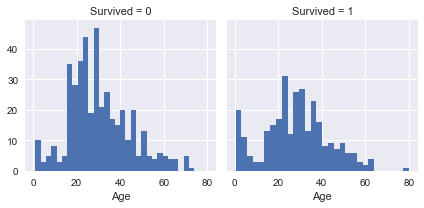

In [133]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Age', bins =30)

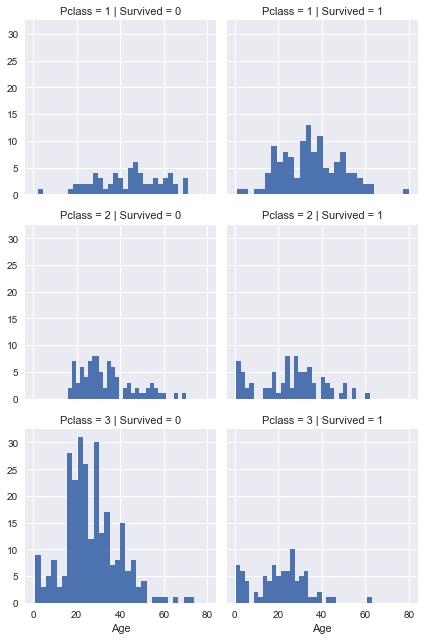

In [134]:
g = sns.FacetGrid(df_train, col='Survived', row='Pclass')
g.map(plt.hist, 'Age', bins =30)

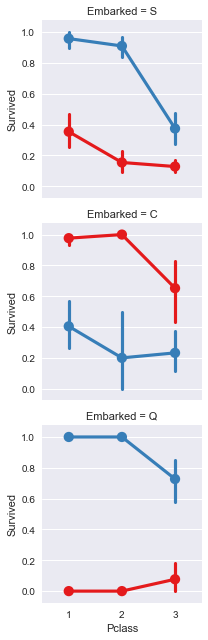

In [135]:
g= sns.FacetGrid(df_train, row ='Embarked')
g.map(sns.pointplot, 'Pclass','Survived','Sex',palette = 'Set1')

In [136]:
combine

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 5              6         0       3   
 6              7         0       1   
 7              8         0       3   
 8              9         1       3   
 9             10         1       2   
 10            11         1       3   
 11            12         1       1   
 12            13         0       3   
 13            14         0       3   
 14            15         0       3   
 15            16         1       2   
 16            17         0       3   
 17            18         1       2   
 18            19         0       3   
 19            20         1       3   
 20            21         0       2   
 21            22         1       2   
 22            23         1       3   
 23            24         1       1   
 24            25        

In [137]:
df_train = df_train.drop(['Ticket','Cabin'], axis=1)
df_test = df_test.drop(['Ticket','Cabin'], axis=1)

In [138]:
combine = [df_train, df_test]

In [139]:
combine[0].shape

(891, 10)

In [140]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand = False)

In [141]:
pd.crosstab(df_train['Title'], df_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [142]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [143]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,Braund Mr. Owen Harris,male,22.0,1,0,7.2500,S,Mr
1,2,1,1,Cumings Mrs. John Bradley (Florence Briggs Tha...,female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,Heikkinen Miss. Laina,female,26.0,0,0,7.9250,S,Miss


In [144]:
df_train.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [145]:
df_train[['Title','Survived']].groupby('Title', as_index=False).mean().sort_values(by='Survived',ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [146]:
title_mapping = {'Mr':1, 'Miss':2,'Mrs':3,'Master':4,'Rare':5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [147]:
df_test.Title.unique()

array([1, 3, 2, 4, 5], dtype=int64)

In [148]:
for dataset in combine:
    dataset = dataset.drop(['Name', 'PassengerId'], axis=1)

In [149]:
combine[0].shape

(891, 11)

In [150]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,Braund Mr. Owen Harris,male,22.0,1,0,7.2500,S,1
1,2,1,1,Cumings Mrs. John Bradley (Florence Briggs Tha...,female,38.0,1,0,71.2833,C,3
2,3,1,3,Heikkinen Miss. Laina,female,26.0,0,0,7.9250,S,2


In [151]:
df_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,Kelly Mr. James,male,34.5,0,0,7.8292,Q,1
1,893,3,Wilkes Mrs. James (Ellen Needs),female,47.0,1,0,7.0000,S,3


In [152]:
df_train = df_train.drop(['Name','PassengerId'], axis=1)
df_test = df_test.drop(['Name'], axis=1)

In [153]:
df_train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3


In [154]:
combine = [df_train, df_test]

In [155]:
sex_mapping = {'male':0,'female':1}
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [156]:
df_train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3


In [157]:
guess_ages = np.zeros((2,3))

In [158]:
guess_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [159]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            df_guess = dataset[(dataset['Sex']==i)&(dataset['Pclass']==j + 1)]['Age'].dropna()
            
            age_guess = df_guess.median()
            guess_ages[i,j]= int(age_guess/0.5 +0.5)*0.5
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull())&(dataset.Sex==i)&(dataset.Pclass==j+1), 'Age'] = guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)
                            
                                                 

In [160]:
df_train.Age.describe()

count    891.000000
mean      29.072952
std       13.326339
min        0.000000
25%       21.000000
50%       26.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [161]:
df_train['Ageband'] = pd.cut(df_train['Age'],5)

In [162]:
df_train[['Ageband','Survived']].groupby('Ageband', as_index=False).mean().sort_values(by='Survived')

,Ageband,Survived
4,"(64, 80]",0.090909
1,"(16, 32]",0.337374
2,"(32, 48]",0.412037
3,"(48, 64]",0.434783
0,"(-0.08, 16]",0.550000


In [163]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Ageband
0,0,3,0,1,1,0,7.2500,S,1,"(16, 32]"
1,1,1,1,2,1,0,71.2833,C,3,"(32, 48]"
2,1,3,1,1,0,0,7.9250,S,2,"(16, 32]"
3,1,1,1,2,1,0,53.1000,S,3,"(32, 48]"
4,0,3,0,2,0,0,8.0500,S,1,"(32, 48]"


In [164]:
df_test.head(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,2,0,0,7.8292,Q,1
1,893,3,1,2,1,0,7.0000,S,3
2,894,2,0,3,0,0,9.6875,Q,1


In [165]:
df_train = df_train.drop(['Ageband'],axis=1)
combine = [df_train, df_test]

In [166]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] = dataset['Parch'] +1
df_train[['FamilySize','Survived']].groupby('FamilySize', as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.600000
1,2,0.550847
2,3,0.500000
0,1,0.343658
5,6,0.200000
4,5,0.000000
6,7,0.000000


In [167]:
df_train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title,FamilySize
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,2.133558,1.381594,0.381594,32.204208,1.728395,1.381594
std,0.486592,0.836071,0.477990,7.615265,0.806057,0.806057,49.693429,1.030039,0.806057
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,7.910400,1.000000,1.000000
50%,0.000000,3.000000,0.000000,1.000000,1.000000,0.000000,14.454200,1.000000,1.000000
75%,1.000000,3.000000,1.000000,2.000000,1.000000,0.000000,31.000000,2.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,7.000000,6.000000,512.329200,5.000000,7.000000


In [168]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize']==1,'IsAlone'] =1

df_train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.511737
1,1,0.343658


In [169]:
df_train = df_train.drop(['Parch','SibSp','FamilySize'], axis =1)
df_test = df_test.drop(['Parch','SibSp','FamilySize'], axis =1)
combine = [df_train, df_test]
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,1
1,1,1,1,2,71.2833,C,3,1
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,1
4,0,3,0,2,8.0500,S,1,1


In [170]:
embarked_mapping = {'S':0, 'C':1,'Q':2}
for dataset in combine:
    dataset['Embarked'] =  dataset['Embarked'].map(embarked_mapping)
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,0.0,1,1
1,1,1,1,2,71.2833,1.0,3,1
2,1,3,1,1,7.9250,0.0,2,1
3,1,1,1,2,53.1000,0.0,3,1
4,0,3,0,2,8.0500,0.0,1,1


In [171]:
df_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,7.8292,2,1,1
1,893,3,1,2,7.0000,0,3,1
2,894,2,0,3,9.6875,2,1,1
3,895,3,0,1,8.6625,0,1,1
4,896,3,1,1,12.2875,0,3,0


In [172]:
df_train.shape

(891, 8)

In [173]:
df_train.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age           int32
Fare        float64
Embarked    float64
Title         int64
IsAlone       int64
dtype: object

In [114]:
df_train['Embarked'].astype(int)

ValueError: Cannot convert NA to integer

In [115]:
df_train.Embarked.dropna().astype(int)

0      0
1      1
2      0
3      0
4      0
5      2
6      0
7      0
8      0
9      1
10     0
11     0
12     0
13     0
14     0
15     0
16     2
17     0
18     0
19     1
20     0
21     0
22     2
23     0
24     0
25     0
26     1
27     0
28     2
29     0
      ..
861    0
862    0
863    0
864    0
865    0
866    1
867    0
868    0
869    0
870    0
871    0
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    0
881    0
882    0
883    0
884    0
885    2
886    0
887    0
888    0
889    1
890    2
Name: Embarked, dtype: int32

In [174]:
value1 = df_test['Fare'].dropna().median()
df_test['Fare'].fillna(value1, inplace = True)
df_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,7.8292,2,1,1
1,893,3,1,2,7.0000,0,3,1
2,894,2,0,3,9.6875,2,1,1
3,895,3,0,1,8.6625,0,1,1
4,896,3,1,1,12.2875,0,3,0


In [176]:
df_train['Fareband'] = pd.cut(df_train['Fare'],4)
# df_train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Fareband
0,0,3,0,1,7.2500,0.0,1,1,"(-0.512, 128.0823]"
1,1,1,1,2,71.2833,1.0,3,1,"(-0.512, 128.0823]"
2,1,3,1,1,7.9250,0.0,2,1,"(-0.512, 128.0823]"
3,1,1,1,2,53.1000,0.0,3,1,"(-0.512, 128.0823]"
4,0,3,0,2,8.0500,0.0,1,1,"(-0.512, 128.0823]"


In [320]:
df_train.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Fareband
0,0,3,0,1,7.2500,0.0,1,1,"(-0.512, 128.0823]"
1,1,1,1,2,71.2833,1.0,3,1,"(-0.512, 128.0823]"


In [177]:
df_train.Fareband.unique()

[(-0.512, 128.0823], (256.165, 384.247], (128.0823, 256.165], (384.247, 512.329]]
Categories (4, object): [(-0.512, 128.0823] < (128.0823, 256.165] < (256.165, 384.247] < (384.247, 512.329]]

In [178]:
df_train[['Fareband', 'Survived']].groupby(['Fareband'], as_index=False).mean().sort_values(by='Fareband', ascending=True)

,Fareband,Survived
0,"(-0.512, 128.0823]",0.368113
1,"(128.0823, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
3,"(384.247, 512.329]",1.000000


In [179]:
for dataset in combine:
    dataset.loc[dataset['Fare']<=128.0823, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 128.0823) & (dataset['Fare'] <= 256.165), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 256.165) & (dataset['Fare'] <= 384.247), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 384.247, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

df_train = df_train.drop(['Fareband'], axis=1)
combine = [df_train, df_test]
df_train.tail(6)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
885,0,3,1,2,0,2.0,3,0
886,0,2,0,1,0,0.0,5,1
887,1,1,1,1,0,0.0,2,1
888,0,3,1,1,0,0.0,2,0
889,1,1,0,1,0,1.0,1,1
890,0,3,0,1,0,2.0,1,1


In [180]:
X_train = df_train.drop('Survived', axis=1)

In [181]:
y_train = df_train['Survived']


In [182]:
X_test = df_test.drop('PassengerId', axis=1).copy()
X_train.shape, y_train.shape, X_test.shape

((891, 7), (891L,), (418, 7))

In [335]:
X_test.isnull()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [189]:
logreg = LogisticRegression()
# logreg.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [187]:
X_train.dtypes

Pclass        int64
Sex           int64
Age           int32
Fare          int32
Embarked    float64
Title         int64
IsAlone       int64
dtype: object

In [186]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [191]:
X_train.to_csv('X_train.csv')
y_train.to_csv('y_train.csv')

In [192]:
X_train.Embarked.describe()

count    889.000000
mean       0.362205
std        0.636157
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000
Name: Embarked, dtype: float64

In [193]:
df_train.groupby('Embarked').count()

,Survived,Pclass,Sex,Age,Fare,Title,IsAlone
Embarked,,,,,,,
0.0,644,644,644,644,644,644,644
1.0,168,168,168,168,168,168,168
2.0,77,77,77,77,77,77,77


In [195]:
X_train.fillna(0)

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,3,0,1,0,0.0,1,1
1,1,1,2,0,1.0,3,1
2,3,1,1,0,0.0,2,1
3,1,1,2,0,0.0,3,1
4,3,0,2,0,0.0,1,1
5,3,0,1,0,2.0,1,1
6,1,0,3,0,0.0,1,1
7,3,0,0,0,0.0,4,0
8,3,1,1,0,0.0,3,0
9,2,1,0,0,1.0,3,1


In [197]:
X_train.to_csv('X_train.csv')

In [198]:
logreg.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [199]:
X_train['Embarked'] = X_train['Embarked'].apply(np.int64)

ValueError: cannot convert float NaN to integer

In [200]:
X_train.iloc[:,4] = np.nan

In [201]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,3,0,1,0,NaN,1,1
1,1,1,2,0,NaN,3,1
2,3,1,1,0,NaN,2,1
3,1,1,2,0,NaN,3,1
4,3,0,2,0,NaN,1,1


In [203]:
df_train = df_train.fillna(0)

In [205]:
X_train=df_train.drop('Survived', axis=1)

In [206]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [207]:
predicted = logreg.predict(X_test)

In [208]:
logreg.score(X_train,y_train)

0.78226711560044893

In [209]:
svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_train, y_train)

0.82940516273849607

In [210]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree.score(X_train, y_train)

0.85185185185185186

In [213]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
random_forest.score(X_train, y_train)

0.85072951739618408

In [214]:
y_predicted = tree.predict(X_test)

In [217]:
summited_csv = pd.DataFrame({"PassengerId":df_test['PassengerId'], "Survived":y_predicted})

In [219]:
summited_csv.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [221]:
summited_csv.to_csv('summited.csv', index = False)

In [222]:
from sklearn import metrics

In [223]:
y_predict_svc = svc.predict(X_train)

In [231]:
metrics.confusion_matrix(y_train, svc.predict(X_train))

# metrics.classification_report(y_train, svc.predict(X_train))

array([[526,  23],
       [129, 213]])

In [233]:
metrics.confusion_matrix(y_train, tree.predict(X_train))

array([[530,  19],
       [113, 229]])

In [234]:
metrics.confusion_matrix(y_train, random_forest.predict(X_train))

array([[521,  28],
       [105, 237]])

In [236]:
y_summited = random_forest.predict(X_test)

In [237]:
summited_csv_RF = pd.DataFrame({"PassengerId":df_test['PassengerId'], "Survived":y_summited})

In [238]:
summited_csv_RF.to_csv('summited_RF.csv', index=False)